In [1]:
import requests

url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1739632436'
response = requests.get(url)
if response.status_code == 200:
    with open('zillow_home_values_data.csv', 'wb') as file:
        file.write(response.content)
    print("ZHVI dataset downloaded successfully.")


ZHVI dataset downloaded successfully.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /zillow_home_values_data.csv')
print("Dataset shape:", df.shape)
print("First five rows:\n", df.head())
print("\nDataset info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (895, 306)
First five rows:
    RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  119729.572640   
1    394913         1     New York, NY        msa        NY  214911.652349   
2    753899         2  Los Angeles, CA        msa        CA  218489.647448   
3    394463         3      Chicago, IL        msa        IL  150432.480390   
4    394514         4       Dallas, TX        msa        TX  125268.936932   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  119940.215341  120201.443305  120761.726012  121406.544234  ...   
1  215824.905614  216746.617250  218614.361683  220548.475724  ...   
2  219302.706154  220385.692595  222540.471813  224897.124751  ...   
3  150571.737044  150836.953795  151496.747161  152290.399220  ...   
4  125324.732154  125388.874474  125555.445340  125775.064467  ...   

      2024-04-30     2024-05-31     2024-06-30     2024-07-31     

In [3]:
print("\nDescriptive statistics:")
print(df.describe())

date_columns = df.columns[5:]
print("\nDate columns detected:", list(date_columns))


Descriptive statistics:
            RegionID    SizeRank     2000-01-31     2000-02-29     2000-03-31  \
count     895.000000  895.000000     431.000000     432.000000     433.000000   
mean   412099.672626  461.751955  105958.656088  106137.421622  106285.089128   
std     78377.355083  268.710532   46834.790998   46947.421303   47137.263973   
min    102001.000000    0.000000   34570.803101   34565.049531   34547.699940   
25%    394546.000000  230.500000   74691.301893   74825.420592   75071.375438   
50%    394795.000000  460.000000   94101.460590   94627.659943   94602.065976   
75%    395044.500000  689.500000  122188.259790  122233.229748  122414.839114   
max    753929.000000  939.000000  359885.688957  361740.508462  364534.760117   

          2000-04-30     2000-05-31     2000-06-30     2000-07-31  \
count     435.000000     437.000000     438.000000     439.000000   
mean   106956.124245  107683.356710  108240.400493  108991.036688   
std     47785.076802   48384.707398   


Reshaped data (first five rows):
   RegionID  SizeRank       RegionName RegionType StateName       Date  \
0    102001         0    United States    country       NaN 2000-01-31   
1    394913         1     New York, NY        msa        NY 2000-01-31   
2    753899         2  Los Angeles, CA        msa        CA 2000-01-31   
3    394463         3      Chicago, IL        msa        IL 2000-01-31   
4    394514         4       Dallas, TX        msa        TX 2000-01-31   

       HomeValue  
0  119729.572640  
1  214911.652349  
2  218489.647448  
3  150432.480390  
4  125268.936932  


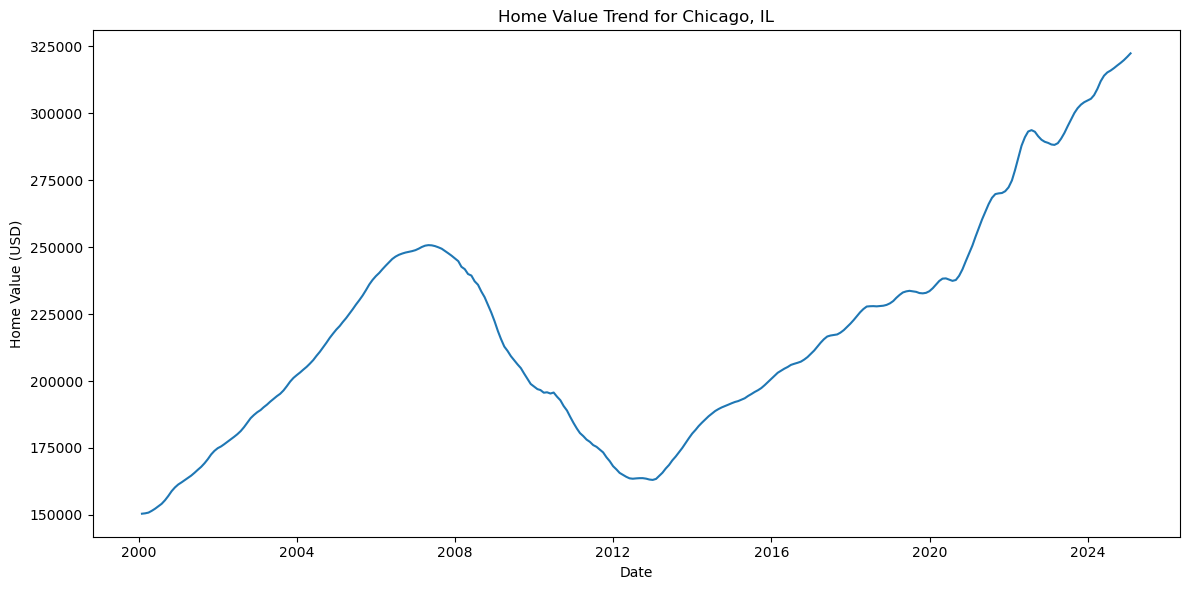

In [4]:
df_melted = df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    value_vars=date_columns,
    var_name='Date',
    value_name='HomeValue'
)

df_melted['Date'] = pd.to_datetime(df_melted['Date'])
print("\nReshaped data (first five rows):")
print(df_melted.head())

region = df_melted[df_melted['RegionName'] == 'Chicago, IL']

plt.figure(figsize=(12, 6))
sns.lineplot(data=region, x='Date', y='HomeValue')
plt.title('Home Value Trend for Chicago, IL')
plt.xlabel('Date')
plt.ylabel('Home Value (USD)')
plt.tight_layout()
plt.show()

### Regions to explore

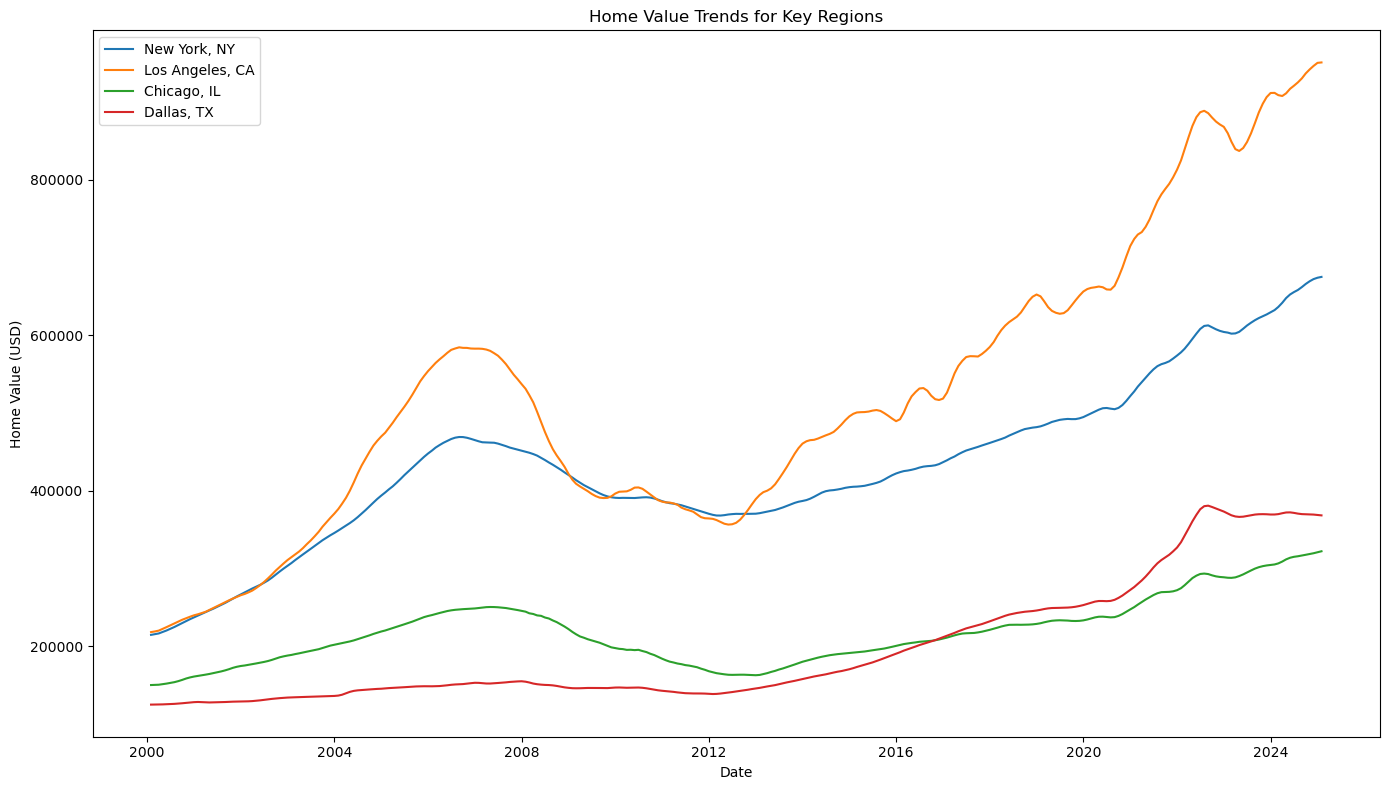

In [5]:
regions_to_plot = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX']

plt.figure(figsize=(14, 8))
for region in regions_to_plot:
    region_data = df_melted[df_melted['RegionName'] == region]
    sns.lineplot(data=region_data, x='Date', y='HomeValue', label=region)

plt.title('Home Value Trends for Key Regions')
plt.xlabel('Date')
plt.ylabel('Home Value (USD)')
plt.legend()
plt.tight_layout()
plt.show()

1. Why not providing specific house market values for regions where mid - economic level folks that makes revenue of $100k per year (household)? What kind of houses are they able to afford? 

2. Would they be sqft of 1500 for 3 - 4 family members that have 100k per year? or 5-6 for 100k per year?   

- In terms of housing affordability for a “mid‑economic level” household earning around $100K per year. 
- In many affordability models, a home priced around 2.5–3× annual income (roughly $250K–$300K) is considered within reach. Although our dataset does not include explicit information about square footage or household incomes, we can use the available regional market values (recorded over time) as a proxy to ask questions such as below. 

1. How do current market values (e.g. the latest date column) compare with a hypothetical affordability threshold (say, $300K)?
2. What is the distribution of home values across region types (e.g. metro areas vs. country-level data)?
3. If we assume a typical home size (e.g. 1500 sqft for 3–4 family members), what implied price per square foot do these market values represent?

In [6]:
latest_date = "2024-12-31"
df['latest_value'] = df[latest_date]
df['latest_value_int'] = df['latest_value'].astype(int)

print("\nSummary statistics for market values on {}:".format(latest_date))
print(df['latest_value_int'].describe())


Summary statistics for market values on 2024-12-31:
count    8.950000e+02
mean     2.797302e+05
std      1.757287e+05
min      4.927000e+04
25%      1.728650e+05
50%      2.317680e+05
75%      3.323700e+05
max      1.607357e+06
Name: latest_value_int, dtype: float64


In [7]:
affordability_threshold = 200000 

In [8]:
df['affordable'] = df['latest_value_int'] < affordability_threshold

In [9]:
affordable_counts = df['affordable'].value_counts()
print("\nAffordable region counts (under ${} threshold):".format(affordability_threshold))
print(affordable_counts)


Affordable region counts (under $200000 threshold):
affordable
False    568
True     327
Name: count, dtype: int64


### Visualization: Distribution of latest market values with the affordability threshold

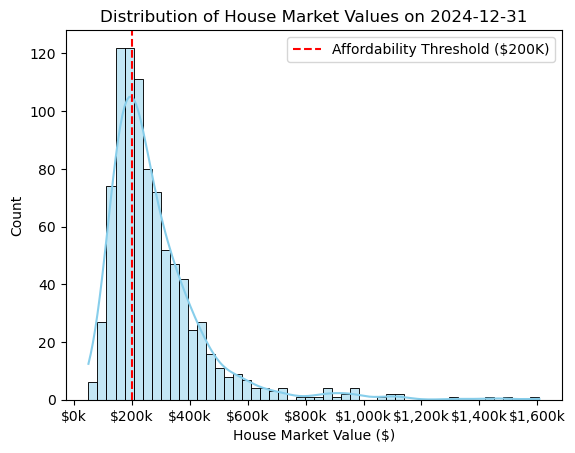

In [10]:
import matplotlib.ticker as mtick

plt.figure()
ax = sns.histplot(df['latest_value_int'], bins=50, kde=True, color="skyblue")
plt.axvline(affordability_threshold, color='red', linestyle='--', label='Affordability Threshold ($200K)')
plt.title("Distribution of House Market Values on {}".format(latest_date))
plt.xlabel("House Market Value ($)")
plt.ylabel("Count")
plt.legend()

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.0f}k'.format(x/1000)))
plt.show()


### Breakdown by Region Type and its Region Names: Which kinds of regions (e.g., metro areas) fall below the threshold?

In [11]:
df_filtered = df[
    (df['StateName'].isin(['IL', 'Indiana'])) &
    (df['RegionType'].str.lower() != 'country') &
    (df['RegionName'] != 'United States')
]

In [12]:
# Variance: ±30% of the affordability
tolerance = 0.30
tolerance_amount = affordability_threshold * tolerance

lower_bound = affordability_threshold - tolerance_amount
upper_bound = affordability_threshold + tolerance_amount

In [13]:
df_range = df_filtered[
    (df_filtered['latest_value'] >= lower_bound) & 
    (df_filtered['latest_value'] <= upper_bound)
].copy()

In [14]:
# Calculate absolute difference from the threshold to rank regions by closeness to $300K
df_range['diff_from_threshold'] = abs(df_range['latest_value'] - affordability_threshold)

In [15]:
# Selected top 15 regions
df_top15 = df_range.sort_values('diff_from_threshold').head(15)

In [16]:
df_top15

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,latest_value,latest_value_int,affordable,diff_from_threshold
746,394557,771,"Effingham, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,197157.392534,197158.332501,197498.874437,197828.147628,198573.752537,198710.850987,198573.752537,198573,True,1426.247463
577,395029,594,"Rochelle, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,198465.940371,198724.431349,199819.579234,201254.514145,202238.813622,202689.572326,202238.813622,202238,False,2238.813622
359,394734,370,"Kankakee, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,198368.278734,199035.752744,200396.065033,201644.799049,202887.876252,203947.177436,202887.876252,202887,False,2887.876252
203,394454,209,"Champaign, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,206456.798912,207266.792341,208325.664498,209334.009855,210021.253034,210717.709664,210021.253034,210021,False,10021.253034
150,395033,153,"Rockford, IL",msa,IL,75503.969504,75548.882360,75600.212541,75800.375340,75779.293313,...,185567.140998,186587.488041,187543.787446,188489.179147,189875.529496,191178.318560,189875.529496,189875,True,10124.470504
213,395114,220,"Springfield, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,174745.574367,174725.508946,175506.756696,176608.067739,177821.418727,178569.218471,177821.418727,177821,True,22178.581273
455,395010,468,"Quincy, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,172140.251165,172339.470694,172758.901787,172822.309726,172369.568668,171801.174040,172369.568668,172369,True,27630.431332
141,394520,144,"Davenport, IA",msa,IL,NaN,NaN,NaN,NaN,NaN,...,171529.910133,171052.109563,170994.786232,171381.215187,172068.051559,172747.625824,172068.051559,172068,True,27931.948441
247,753869,255,"Bloomington, IL",msa,IL,130835.999554,131057.357131,131312.742556,131916.737770,132615.695968,...,227941.930177,228555.090939,229514.404412,230875.761559,232631.914400,234463.557635,232631.914400,232631,False,32631.914400
750,394535,775,"Dixon, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,156760.320053,156270.477121,156417.289650,157185.491648,158190.011628,159492.197344,158190.011628,158190,True,41809.988372


/var/folders/vr/txw5f_kj4h9653_2bzcpzn6w0000gn/T/ipykernel_8667/2786393540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top15, x='RegionName', y='latest_value', palette="viridis")


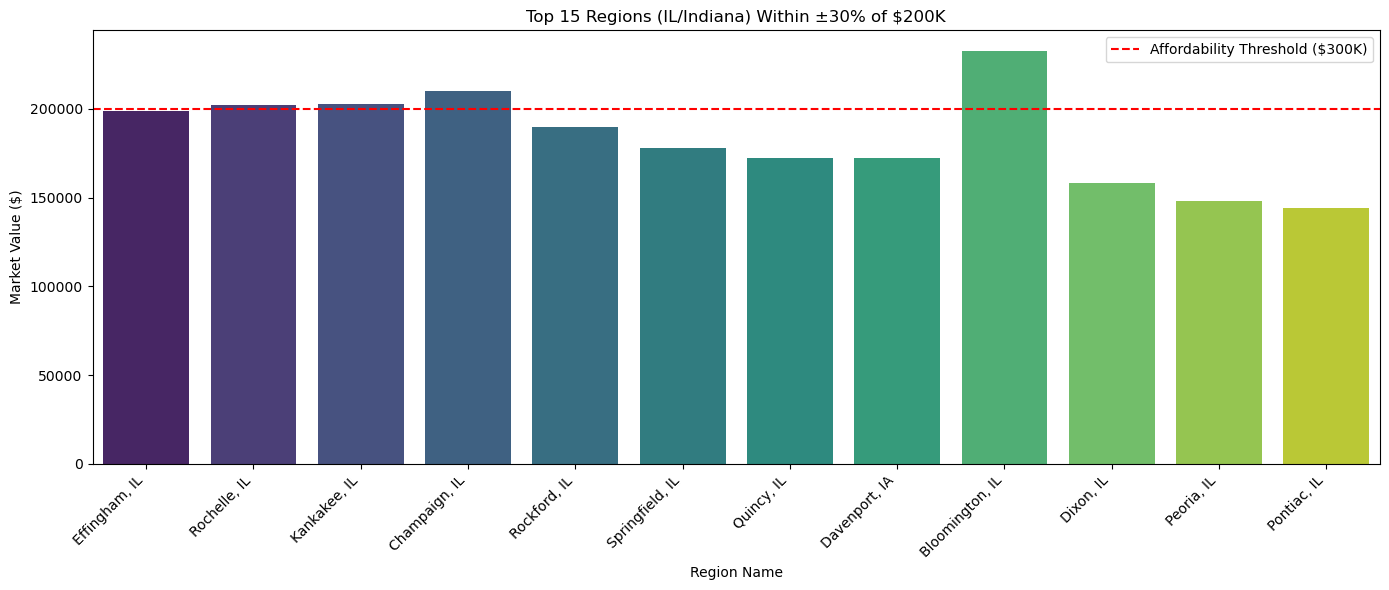

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top15, x='RegionName', y='latest_value', palette="viridis")
plt.axhline(affordability_threshold, color='red', linestyle='--', label='Affordability Threshold ($300K)')
plt.title("Top 15 Regions (IL/Indiana) Within ±30% of $200K")
plt.xlabel("Region Name")
plt.ylabel("Market Value ($)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Trend of these areas

In [18]:
date_cols = df.columns[160:306] 
df_melted = df.melt(
    id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
    value_vars=date_cols,
    var_name="Date",
    value_name="MarketValue"
)

df_melted['Date'] = pd.to_datetime(df_melted['Date'], format="%Y-%m-%d")


In [19]:
top15_regions = df_top15['RegionName'].unique()
df_top15_melted = df_melted[df_melted['RegionName'].isin(top15_regions)]

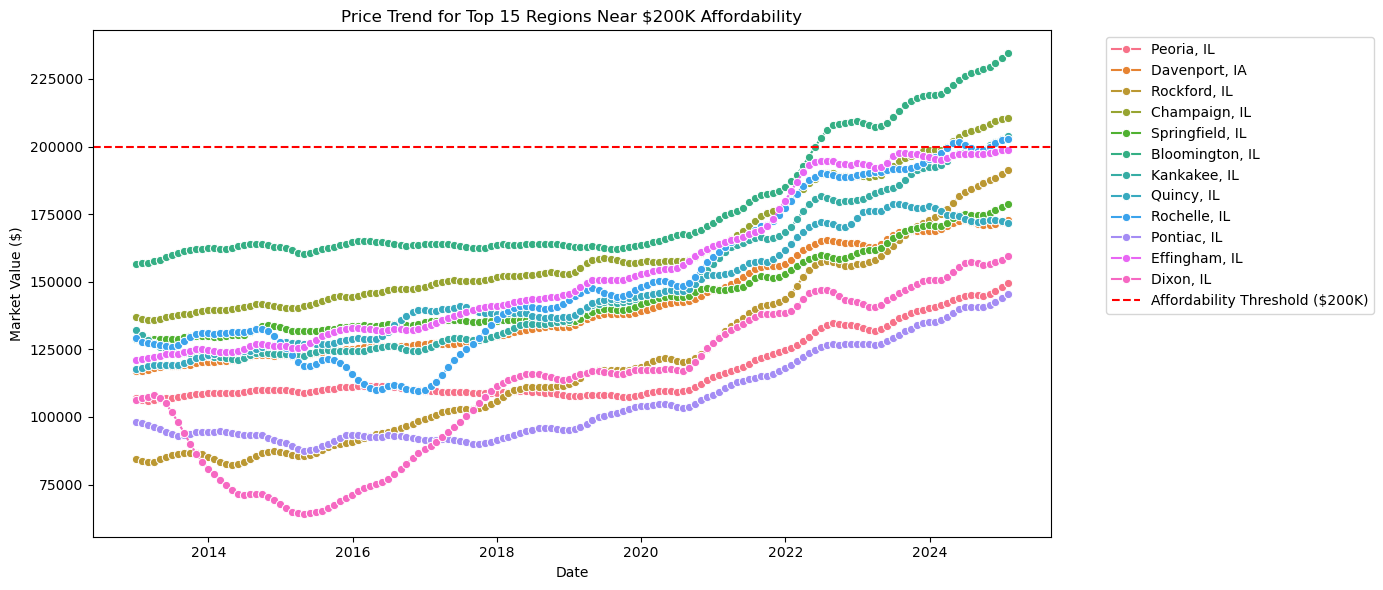

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top15_melted, x='Date', y='MarketValue', hue='RegionName', marker='o')
plt.axhline(200000, color='red', linestyle='--', label='Affordability Threshold ($200K)')
plt.title("Price Trend for Top 15 Regions Near $200K Affordability")
plt.xlabel("Date")
plt.ylabel("Market Value ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd 

df = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /cleaned_combined_dataset.csv')
df.head()

,Adjusted_Income,Personal_Income,Household_Size,Age,Bedrooms,Tenure,Building_Type,Region
0,1207712,65240.0,2,29,5.0,1.0,2.0,4900
1,1207712,75000.0,2,29,5.0,1.0,2.0,4900
2,1207712,94000.0,2,36,5.0,1.0,2.0,4900
3,1207712,90000.0,2,36,5.0,1.0,2.0,4900
4,1207712,60000.0,2,30,5.0,1.0,2.0,4900


In [22]:
df.shape

(343200, 8)

In [31]:
df2 = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /zillow_home_values_data.csv')
df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,119729.572640,119940.215341,120201.443305,120761.726012,121406.544234,...,350165.829700,351570.606154,352120.860853,352265.907749,352504.359843,352945.853239,353522.496915,354005.575460,354711.020713,355327.955070
1,394913,1,"New York, NY",msa,NY,214911.652349,215824.905614,216746.617250,218614.361683,220548.475724,...,647851.001125,652477.077381,655536.133683,658263.386724,661979.750511,665977.942675,669477.234967,672228.240789,673999.838327,675063.976036
2,753899,2,"Los Angeles, CA",msa,CA,218489.647448,219302.706154,220385.692595,222540.471813,224897.124751,...,911031.498845,916863.716873,920777.178084,925109.643477,930243.585193,936603.517696,941773.674116,946228.303841,950210.062120,950740.494586
3,394463,3,"Chicago, IL",msa,IL,150432.480390,150571.737044,150836.953795,151496.747161,152290.399220,...,311972.006665,314053.134292,315253.946820,315976.493240,316881.631507,317866.656523,318826.563429,319846.118364,321070.725716,322389.516129
4,394514,4,"Dallas, TX",msa,TX,125268.936932,125324.732154,125388.874474,125555.445340,125775.064467,...,372240.198836,372383.086130,371723.001722,370790.474579,370143.446717,369946.958796,369841.800601,369555.460608,369035.088390,368515.900537


In [32]:
df2.shape

(895, 306)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343200 entries, 0 to 343199
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Adjusted_Income  343200 non-null  int64  
 1   Personal_Income  343200 non-null  float64
 2   Household_Size   343200 non-null  int64  
 3   Age              343200 non-null  int64  
 4   Bedrooms         343200 non-null  float64
 5   Tenure           343200 non-null  float64
 6   Building_Type    343200 non-null  float64
 7   Region           343200 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 20.9 MB


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 306 entries, RegionID to 2025-01-31
dtypes: float64(301), int64(2), object(3)
memory usage: 2.1+ MB


In [25]:
df2 = df2.iloc[1:].reset_index(drop=True)

In [28]:
df2 = df2.iloc[1:].reset_index(drop=True)

target_regions = [
    'Effingham, IL',
    'Rochelle, IL',
    'Kankakee, IL',
    'Champaign, IL',
    'Rockford, IL',
    'Springfield, IL',
    'Quincy, IL',
    'Davenport, IA',
    'Bloomington, IL',
    'Dixon, IL',
    'Peoria, IL',
    'Pontiac, IL'
]

filtered_df = df2[df2["RegionName"].isin(target_regions)]

In [29]:
print(filtered_df)


     RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
131    394972       136       Peoria, IL        msa        IL            NaN   
139    394520       144    Davenport, IA        msa        IL            NaN   
148    395033       153     Rockford, IL        msa        IL   75503.969504   
201    394454       209    Champaign, IL        msa        IL            NaN   
211    395114       220  Springfield, IL        msa        IL            NaN   
245    753869       255  Bloomington, IL        msa        IL  130835.999554   
357    394734       370     Kankakee, IL        msa        IL            NaN   
453    395010       468       Quincy, IL        msa        IL            NaN   
575    395029       594     Rochelle, IL        msa        IL            NaN   
730    394992       754      Pontiac, IL        msa        IL   71362.216879   
744    394557       771    Effingham, IL        msa        IL            NaN   
748    394535       775        Dixon, IL

In [30]:
filtered_df.shape

(12, 306)